<a href="https://colab.research.google.com/github/wojgus/AI-for-the-Industry-4.0/blob/main/AI_for_the_Industry_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


Unfortunately due to lack of time i coudn't finish all models to test best resoults,but for now i can tell that the best coure of action will be use of PolynomialFeatures and i woudl consider using SVC

#Data reading

In [ ]:
data_path = 'drive/MyDrive/Dataset/'

In [ ]:
df = pd.read_csv(f'{data_path}/sesion_01_20/sensor01_air.txt')

In [ ]:
df.sample(10)

,1.35e-06,9.1792
527,0.000001,6.36310
92,0.000001,8.81040
674,0.000001,5.48610
2204,0.000002,-2.01200
661,0.000001,5.55740
1998,0.000002,-4.49500
1646,0.000002,-6.35120
2331,0.000002,-0.56414
589,0.000001,6.10580
55,0.000001,8.93120


In [ ]:
df.dtypes

1.35e-06    float64
9.1792      float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1.35e-06  3000 non-null   float64
 1   9.1792    3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [ ]:
df.describe()

,1.35e-06,9.1792
count,3.000000e+03,3000.000000
mean,1.500050e-06,1.187713
std,8.661697e-08,4.722722
min,1.350100e-06,-7.151200
25%,1.425075e-06,-2.635050
50%,1.500050e-06,1.615850
75%,1.575025e-06,4.879975
max,1.650000e-06,9.253300


In [ ]:
df.columns=['signal_wavelength', 'signal_amplitude']

In [ ]:
df.sample(10)

,signal_wavelength,signal_amplitude
303,0.000001,7.92100
2067,0.000002,-3.83710
1261,0.000001,-0.63770
2134,0.000002,-2.69120
1042,0.000001,2.16850
1657,0.000002,-6.43380
446,0.000001,6.92240
2538,0.000002,1.05600
2317,0.000002,-0.66047
894,0.000001,3.64860


In [ ]:
df.sample

<bound method NDFrame.sample of       signal_wavelength  signal_amplitude
0              0.000001            9.2003
1              0.000001            9.1968
2              0.000001            9.1028
3              0.000001            9.0601
4              0.000001            9.1118
...                 ...               ...
2995           0.000002            3.8310
2996           0.000002            3.8613
2997           0.000002            3.8361
2998           0.000002            3.9466
2999           0.000002            3.8974

[3000 rows x 2 columns]>

#PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df

,signal_wavelength,signal_amplitude
0,0.000001,9.2003
1,0.000001,9.1968
2,0.000001,9.1028
3,0.000001,9.0601
4,0.000001,9.1118
...,...,...
2995,0.000002,3.8310
2996,0.000002,3.8613
2997,0.000002,3.8361
2998,0.000002,3.9466


#LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['signal_wavelength']] 

In [ ]:
y = df[['signal_amplitude']]

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

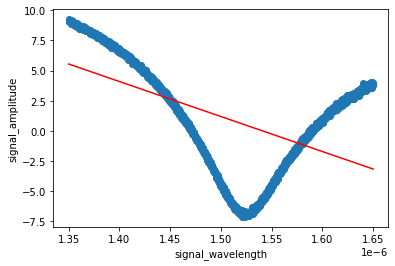

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, lr.predict(X), c='r')

plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1)

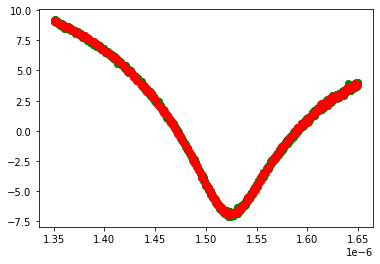

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train, c='g')
ax.scatter(X_test, y_test, c='r')

plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.28725210557330505
0.2684276187408745


#K-menas

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
silhouette_scores = []
n_clusters = []

for k in range(2,6):

  kmeans = KMeans(n_clusters=k,n_init = 'auto')
  kmeans.fit(X_std)

  ss = silhouette_score(X_std, kmeans.predict(X_std))
  silhouette_scores.append(ss)
  n_clusters.append(k)

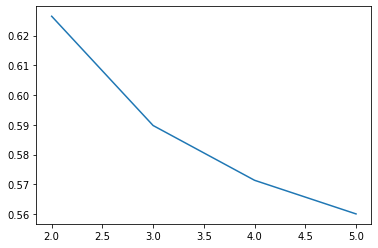

In [ ]:
fig, ax = plt.subplots()

ax.plot(n_clusters, silhouette_scores)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(X_std)
clusters = kmeans.predict(X_std)

In [ ]:
clusters

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

#Logistic Regression

#Decision Tree

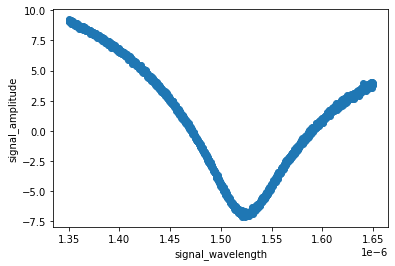

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X,y)
plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(4)
X_pf = pf.fit_transform(X)

In [ ]:
lr = LinearRegression()
lr.fit(X_pf, y)

LinearRegression()

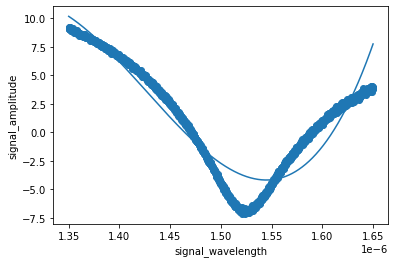

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X,y)
ax.plot(X, lr.predict(X_pf))
plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
lr.score(X_pf,y)

0.8923056588709073

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
dtr_0 = DecisionTreeRegressor()
dtr_0.fit(X, y)

DecisionTreeRegressor()

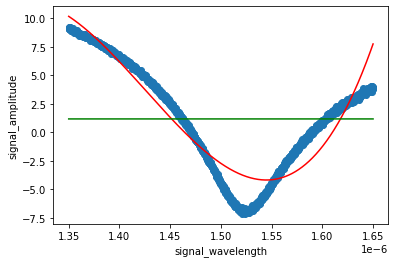

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X,y)
ax.plot(X, lr.predict(X_pf), c='r')
ax.plot(X, dtr_0.predict(X), c='g')

plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
dtr_0.score(X, y)

0.0

In [ ]:
dtr =  DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
dtr.fit(X, y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

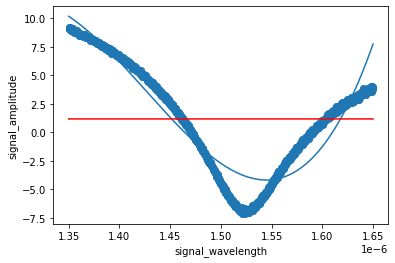

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X,y)
ax.plot(X, lr.predict(X_pf))
ax.plot(X, dtr.predict(X), c='r')
plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
dtr.score(X, y)

0.0

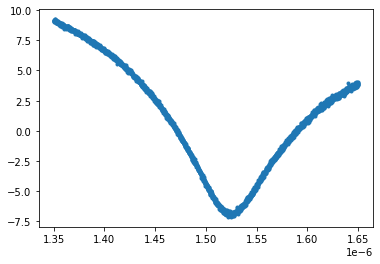

In [ ]:
plt.scatter(X, y, marker='.')

In [ ]:
lr_1 = LinearRegression()
lr_1.fit(X, y) 

LinearRegression()

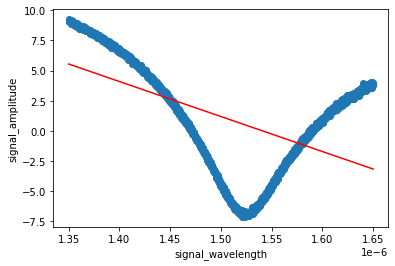

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, lr_1.predict(X), c='r')

plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

In [ ]:
lr_1.coef_

array([[-29047843.30167988]])

In [ ]:
lr_1.score(X, y)

0.2838239736788368

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
lr_2 = LinearRegression()

In [ ]:
pf_2 = PolynomialFeatures(degree=2)

In [ ]:
X_2 = pf_2.fit_transform(X)

In [ ]:
lr_2.fit(X_2, y)


LinearRegression()

In [ ]:
y_pred_2 = lr_2.predict(X_2)

In [ ]:
lr_2.score(X_2, y)

0.8286983328619031

In [ ]:
X_fit = df[['signal_wavelength']]
y_pred_2 = lr_2.predict(pf_2.transform(X_fit))

fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X_fit, y_pred_2, c='r')

plt.xlabel('signal_wavelength')
plt.ylabel('signal_amplitude')

plt.show()

<ipython-input-177-b47759ec6fd1>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X_fit = df[['signal_wavelength']]


IndexError: ignored

#Random Forest

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
df = np.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

ValueError: ignored

In [ ]:
svm = SVC(C=0.000000000001, kernel="linear")
svm.fit(X_train, y_train)